In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# essential libraries
import numpy as np 
import pandas as pd
# for data visulization
import matplotlib.pyplot as plt
import seaborn as sns


#for data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  OneHotEncoder as ohe
from sklearn.preprocessing import StandardScaler as ss
from sklearn.compose import ColumnTransformer as ct
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# for modeling estimators
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier as gbm
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb

# for measuring performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
import sklearn.metrics as metrics
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#for tuning parameters
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV
from eli5.sklearn import PermutationImportance

# Misc.
import os
import time
import gc
import random
from scipy.stats import uniform
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
pd.options.display.max_columns = 150

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [7]:
train = pd.read_csv('../input/train.csv', index_col='Id')
test = pd.read_csv('../input/test.csv', index_col='Id')

In [8]:
train.head(3)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.00,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.00,64.0,144.0,4489,4
ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.25,64.0,121.0,8464,4


In [9]:
test.head(3)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681


**Checking for Missing Value**

In [10]:
train_null = train.isnull().sum()
train_null_non_zero = train_null[train_null>0] / train.shape[0]

In [11]:
train_null_non_zero

v2a1         0.717798
v18q1        0.768233
rez_esc      0.829549
meaneduc     0.000523
SQBmeaned    0.000523
dtype: float64

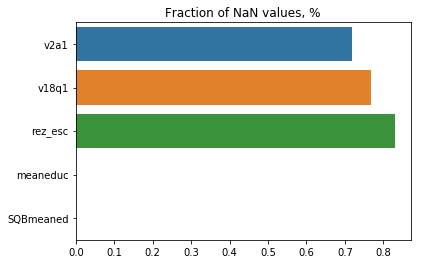

In [12]:
sns.barplot(x=train_null_non_zero, y=train_null_non_zero.index)
_ = plt.title('Fraction of NaN values, %')

In [13]:
train.select_dtypes('object').head()

,idhogar,dependency,edjefe,edjefa
Id,,,,
ID_279628684,21eb7fcc1,no,10,no
ID_f29eb3ddd,0e5d7a658,8,12,no
ID_68de51c94,2c7317ea8,8,no,11
ID_d671db89c,2b58d945f,yes,11,no
ID_d56d6f5f5,2b58d945f,yes,11,no


In [14]:
yes_no_map = {'no':0,'yes':1}
train['dependency'] = train['dependency'].replace(yes_no_map).astype(np.float32)
train['edjefe'] = train['edjefe'].replace(yes_no_map).astype(np.float32)
train['edjefa'] = train['edjefa'].replace(yes_no_map).astype(np.float32)   

In [15]:
yes_no_map = {'no':0,'yes':1}
test['dependency'] = test['dependency'].replace(yes_no_map).astype(np.float32)
test['edjefe'] = test['edjefe'].replace(yes_no_map).astype(np.float32)
test['edjefa'] = test['edjefa'].replace(yes_no_map).astype(np.float32)

In [16]:
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

missing.sort_values('percent', ascending = False).head(10)

,total,percent
rez_esc,7928,0.829549
v18q1,7342,0.768233
v2a1,6860,0.717798
SQBmeaned,5,0.000523
meaneduc,5,0.000523
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000
idhogar,0,0.000000


In [17]:
train['v18q1'] = train['v18q1'].fillna(0)
test['v18q1'] = test['v18q1'].fillna(0)

In [18]:
train['v2a1'] = train['v2a1'].fillna(0)
test['v2a1'] = test['v2a1'].fillna(0)

In [19]:
train['rez_esc'] = train['rez_esc'].fillna(0)
test['rez_esc'] = test['rez_esc'].fillna(0)
train['SQBmeaned'] = train['SQBmeaned'].fillna(0)
test['SQBmeaned'] = test['SQBmeaned'].fillna(0)
train['meaneduc'] = train['meaneduc'].fillna(0)
test['meaneduc'] = test['meaneduc'].fillna(0)

In [20]:
#Checking for missing values again to confirm that no missing values present
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

missing.sort_values('percent', ascending = False).head(10)

,total,percent
v2a1,0,0.0
hogar_mayor,0,0.0
parentesco10,0,0.0
parentesco11,0,0.0
parentesco12,0,0.0
idhogar,0,0.0
hogar_nin,0,0.0
hogar_adul,0,0.0
hogar_total,0,0.0
parentesco8,0,0.0


In [21]:
#Checking for missing values again to confirm that no missing values present
# Number of missing in each column
missing = pd.DataFrame(test.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

missing.sort_values('percent', ascending = False).head(10)

,total,percent
v2a1,0,0.0
hogar_mayor,0,0.0
parentesco10,0,0.0
parentesco11,0,0.0
parentesco12,0,0.0
idhogar,0,0.0
hogar_nin,0,0.0
hogar_adul,0,0.0
hogar_total,0,0.0
parentesco8,0,0.0


In [22]:
train.drop(['idhogar'], inplace = True, axis =1)

test.drop(['idhogar'], inplace = True, axis =1)

**Preparing Data for Modeling **

In [23]:
train.shape

(9557, 141)

In [24]:
test.shape

(23856, 140)

In [25]:
y = train.iloc[:,140]
y.unique()

array([4, 2, 3, 1])

In [26]:
X = train.iloc[:,1:141]
X.shape

(9557, 140)

*Scaling numeric features & applying PCA to reduce features*

In [27]:
my_imputer = SimpleImputer()
X = my_imputer.fit_transform(X)
scale = ss()
X = scale.fit_transform(X)

In [28]:
#subjecting the same to test data
my_imputer = SimpleImputer()
test = my_imputer.fit_transform(test)
scale = ss()
test = scale.fit_transform(test)

In [29]:
X.shape, y.shape,test.shape

((9557, 140), (9557,), (23856, 140))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size = 0.2)

**Modeling**
1. Random Forest

In [31]:
modelrf = rf()

In [32]:
start = time.time()
modelrf = modelrf.fit(X_train, y_train)
end = time.time()
(end-start)/60

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.002603431542714437

In [33]:
classes = modelrf.predict(X_test)

In [34]:
(classes == y_test).sum()/y_test.size 

0.9686192468619247

In [35]:
f1 = f1_score(y_test, classes, average='macro')
f1

0.9379695904889127

2. Performing tuning using Bayesian Optimization.

In [36]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    rf(
       n_jobs = 2         # No need to tune this parameter value
      ),

    # 2.12 Specify estimator parameters that you would like to change/tune
    {
        'n_estimators': (100, 500),           # Specify integer-values parameters like this
        'criterion': ['gini', 'entropy'],     # Specify categorical parameters as here
        'max_depth': (4, 100),                # integer valued parameter
        'max_features' : (10,64),             # integer-valued parameter
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   # Float-valued parameter
    },

    # 2.13
    n_iter=32,            # How many points to sample
    cv = 3                # Number of cross-validation folds
)

In [37]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

BayesSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'n_estimators': (100, 500), 'criterion': ['gini', 'entropy'], 'max_depth': (4, 100), 'max_features': (10, 64), 'min_weight_fraction_leaf': (0, 0.5, 'uniform')},
       verbose=0)

In [38]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'criterion': 'entropy',
 'max_depth': 99,
 'max_features': 46,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 422}

In [41]:
modelrfTuned=rf(criterion="entropy",
               max_depth=77,
               max_features=64,
               min_weight_fraction_leaf=0.0,
               n_estimators=500)

In [42]:
start = time.time()
modelrfTuned = modelrfTuned.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.18019567330678304

In [43]:
yrf=modelrfTuned.predict(X_test)
yrf

array([4, 4, 4, ..., 2, 4, 2])

In [44]:
yrftest=modelrfTuned.predict(test)
yrftest

array([2, 3, 3, ..., 2, 2, 4])

In [45]:
#  Get what average accuracy was acheived during cross-validation
bayes_cv_tuner.best_score_

1.0

In [46]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

1.0

In [47]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

[{'criterion': 'entropy',
  'max_depth': 4,
  'max_features': 12,
  'min_weight_fraction_leaf': 0.4474627730824411,
  'n_estimators': 337},
 {'criterion': 'gini',
  'max_depth': 70,
  'max_features': 12,
  'min_weight_fraction_leaf': 0.1514365689607405,
  'n_estimators': 206},
 {'criterion': 'entropy',
  'max_depth': 69,
  'max_features': 62,
  'min_weight_fraction_leaf': 0.4919658565672764,
  'n_estimators': 228},
 {'criterion': 'gini',
  'max_depth': 37,
  'max_features': 24,
  'min_weight_fraction_leaf': 0.36939979373890236,
  'n_estimators': 371},
 {'criterion': 'entropy',
  'max_depth': 40,
  'max_features': 52,
  'min_weight_fraction_leaf': 0.32936805441073735,
  'n_estimators': 337},
 {'criterion': 'entropy',
  'max_depth': 69,
  'max_features': 11,
  'min_weight_fraction_leaf': 0.03321277554053693,
  'n_estimators': 100},
 {'criterion': 'gini',
  'max_depth': 92,
  'max_features': 57,
  'min_weight_fraction_leaf': 0.31115745389091515,
  'n_estimators': 263},
 {'criterion': 'ent

Accuracy improved from 71.91% to 76.20%

**Modelling with ExtraTreeClassifier**

In [48]:
modeletf = ExtraTreesClassifier()

In [49]:
start = time.time()
modeletf = modeletf.fit(X_train, y_train)
end = time.time()
(end-start)/60

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.002813442548116048

In [50]:
classes = modeletf.predict(X_test)

classes

array([4, 4, 4, ..., 2, 4, 2])

In [51]:
(classes == y_test).sum()/y_test.size

0.9806485355648535

In [52]:
f1 = f1_score(y_test, classes, average='macro')
f1

0.9634635360061568

**Performing tuning using Bayesian Optimization.**

In [53]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    ExtraTreesClassifier( ),

    # 2.12 Specify estimator parameters that you would like to change/tune
    {   'n_estimators': (100, 500),           # Specify integer-values parameters like this
        'criterion': ['gini', 'entropy'],     # Specify categorical parameters as here
        'max_depth': (4, 100),                # integer valued parameter
        'max_features' : (10,64),             # integer-valued parameter
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   # Float-valued parameter
    },

    n_iter=32,            # How many points to sample
    cv = 2            # Number of cross-validation folds
)

In [54]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

BayesSearchCV(cv=2, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'n_estimators': (100, 500), 'criterion': ['gini', 'entropy'], 'max_depth': (4, 100), 'max_features': (10, 64), 'min_weight_fraction_leaf': (0, 0.5, 'uniform')},
       verbose=0)

In [55]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

{'criterion': 'gini',
 'max_depth': 22,
 'max_features': 64,
 'min_weight_fraction_leaf': 0.017605602612585286,
 'n_estimators': 256}

In [56]:
modeletfTuned=ExtraTreesClassifier(criterion="entropy",
               max_depth=100,
               max_features=64,
               min_weight_fraction_leaf=0.0,
               n_estimators=500)

In [57]:
start = time.time()
modeletfTuned = modeletfTuned.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.1983851949373881

In [58]:
yetf=modeletfTuned.predict(X_test)

In [59]:
yetftest=modeletfTuned.predict(test)

In [60]:
#  Get what average accuracy was acheived during cross-validation
bayes_cv_tuner.best_score_

1.0

In [61]:
#  Get what average accuracy was acheived during cross-validation
bayes_cv_tuner.best_score_

1.0

In [62]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

1.0

In [63]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

[{'criterion': 'gini',
  'max_depth': 44,
  'max_features': 56,
  'min_weight_fraction_leaf': 0.01642682616720437,
  'n_estimators': 207},
 {'criterion': 'entropy',
  'max_depth': 36,
  'max_features': 54,
  'min_weight_fraction_leaf': 0.40501459889985625,
  'n_estimators': 206},
 {'criterion': 'gini',
  'max_depth': 51,
  'max_features': 34,
  'min_weight_fraction_leaf': 0.2501822698191007,
  'n_estimators': 376},
 {'criterion': 'gini',
  'max_depth': 61,
  'max_features': 21,
  'min_weight_fraction_leaf': 0.35216071712233504,
  'n_estimators': 193},
 {'criterion': 'gini',
  'max_depth': 15,
  'max_features': 18,
  'min_weight_fraction_leaf': 0.17595745645365654,
  'n_estimators': 150},
 {'criterion': 'gini',
  'max_depth': 43,
  'max_features': 60,
  'min_weight_fraction_leaf': 0.314832448976775,
  'n_estimators': 475},
 {'criterion': 'entropy',
  'max_depth': 16,
  'max_features': 18,
  'min_weight_fraction_leaf': 0.4859927636388156,
  'n_estimators': 485},
 {'criterion': 'entropy',

3. Modelling with KNeighborsClassifier

In [64]:
modelneigh = KNeighborsClassifier(n_neighbors=4)

In [65]:
start = time.time()
modelneigh = modelneigh.fit(X_train, y_train)
end = time.time()
(end-start)/60

0.002128314971923828

In [66]:
classes = modelneigh.predict(X_test)

classes

array([4, 4, 2, ..., 2, 4, 2])

In [67]:
(classes == y_test).sum()/y_test.size 

0.8206066945606695

In [68]:
f1 = f1_score(y_test, classes, average='macro')
f1

0.7416536497096724

**Performing tuning using Bayesian Optimization.**

In [69]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    KNeighborsClassifier(
       n_neighbors=4         # No need to tune this parameter value
      ),
    {"metric": ["euclidean", "cityblock"]},
    n_iter=32,            # How many points to sample
    cv = 2            # Number of cross-validation folds
   )

In [ ]:
bayes_cv_tuner.fit(X_train, y_train)

In [ ]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

In [ ]:
modelneighTuned = KNeighborsClassifier(n_neighbors=4,
               metric="cityblock")

In [ ]:
start = time.time()
modelneighTuned = modelneighTuned.fit(X_train, y_train)
end = time.time()
(end-start)/60

In [ ]:
yneigh=modelneighTuned.predict(X_test)

In [ ]:
yneightest=modelneighTuned.predict(test)

In [ ]:
#  Get what average accuracy was acheived during cross-validation
bayes_cv_tuner.best_score_

In [ ]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

In [ ]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

**Modelling with GradientBoostingClassifier
**

In [ ]:
modelgbm=gbm()

In [ ]:
start = time.time()
modelgbm = modelgbm.fit(X_train, y_train)
end = time.time()
(end-start)/60

In [ ]:
classes = modelgbm.predict(X_test)

classes

In [ ]:
(classes == y_test).sum()/y_test.size 

In [ ]:
f1 = f1_score(y_test, classes, average='macro')
f1

**Performing tuning using Bayesian Optimization.**

In [ ]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    gbm(
               # No need to tune this parameter value
      ),

    # 2.12 Specify estimator parameters that you would like to change/tune
    {
        'n_estimators': (100, 500),           # Specify integer-values parameters like this
        
        'max_depth': (4, 100),                # integer valued parameter
        'max_features' : (10,64),             # integer-valued parameter
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   # Float-valued parameter
    },

    # 2.13
    n_iter=32,            # How many points to sample
    cv = 2                # Number of cross-validation folds
)

In [ ]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

In [ ]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

In [ ]:
modelgbmTuned=gbm(
               max_depth=84,
               max_features=11,
               min_weight_fraction_leaf=0.04840,
               n_estimators=489)

In [ ]:
start = time.time()
modelgbmTuned = modelgbmTuned.fit(X_train, y_train)
end = time.time()
(end-start)/60

In [ ]:
ygbm=modelgbmTuned.predict(X_test)

In [ ]:
ygbmtest=modelgbmTuned.predict(test)

In [ ]:
#  Get what average accuracy was acheived during cross-validation
bayes_cv_tuner.best_score_

In [ ]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

In [ ]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

**Modelling with XGBClassifier**

In [ ]:
modelxgb=XGBClassifier()

In [ ]:
start = time.time()
modelxgb = modelxgb.fit(X_train, y_train)
end = time.time()
(end-start)/60

In [ ]:
classes = modelxgb.predict(X_test)

classes

In [ ]:
(classes == y_test).sum()/y_test.size 

In [ ]:
f1 = f1_score(y_test, classes, average='macro')
f1

**Performing tuning using Bayesian Optimization.**

In [ ]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    XGBClassifier(
       n_jobs = 2         # No need to tune this parameter value
      ),

    # 2.12 Specify estimator parameters that you would like to change/tune
    {
        'n_estimators': (100, 500),           # Specify integer-values parameters like this
        'criterion': ['gini', 'entropy'],     # Specify categorical parameters as here
        'max_depth': (4, 100),                # integer valued parameter
        'max_features' : (10,64),             # integer-valued parameter
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   # Float-valued parameter
    },

    # 2.13
    n_iter=32,            # How many points to sample
    cv = 3                # Number of cross-validation folds
)

In [ ]:
# Start optimization
bayes_cv_tuner.fit(X_train, y_train)

In [ ]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

In [ ]:
modelxgbTuned=XGBClassifier(criterion="gini",
               max_depth=4,
               max_features=15,
               min_weight_fraction_leaf=0.05997,
               n_estimators=499)

In [ ]:
start = time.time()
modelxgbTuned = modelxgbTuned.fit(X_train, y_train)
end = time.time()
(end-start)/60

In [ ]:
yxgb=modelxgbTuned.predict(X_test)

In [ ]:
yxgbtest=modelxgbTuned.predict(test)

In [ ]:
#  Get what average accuracy was acheived during cross-validation
bayes_cv_tuner.best_score_

In [ ]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

In [ ]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

**Modelling with Light Gradient Booster**

In [ ]:
modellgb = lgb.LGBMClassifier(max_depth=-1, learning_rate=0.1, objective='multiclass',
                             random_state=None, silent=True, metric='None', 
                             n_jobs=4, n_estimators=5000, class_weight='balanced',
                             colsample_bytree =  0.93, min_child_samples = 95, num_leaves = 14, subsample = 0.96)

In [ ]:
start = time.time()
modellgb = modellgb.fit(X_train, y_train)
end = time.time()
(end-start)/60

In [ ]:
classes = modellgb.predict(X_test)

classes

In [ ]:
(classes == y_test).sum()/y_test.size 

In [ ]:
f1 = f1_score(y_test, classes, average='macro')
f1

**Performing tuning using Bayesian Optimization**

In [ ]:
bayes_cv_tuner = BayesSearchCV(
    #  Place your estimator here with those parameter values
    #      that you DO NOT WANT TO TUNE
    lgb.LGBMClassifier(
       n_jobs = 2         # No need to tune this parameter value
      ),

    # 2.12 Specify estimator parameters that you would like to change/tune
    {
        'n_estimators': (100, 500),           # Specify integer-values parameters like this
        'criterion': ['gini', 'entropy'],     # Specify categorical parameters as here
        'max_depth': (4, 100),                # integer valued parameter
        'max_features' : (10,64),             # integer-valued parameter
        'min_weight_fraction_leaf' : (0,0.5, 'uniform')   # Float-valued parameter
    },

    # 2.13
    n_iter=32,            # How many points to sample
    cv = 3                # Number of cross-validation folds
)

In [ ]:
#  Get list of best-parameters
bayes_cv_tuner.best_params_

In [ ]:
modellgbTuned = lgb.LGBMClassifier(criterion="gini",
               max_depth=5,
               max_features=53,
               min_weight_fraction_leaf=0.01674,
               n_estimators=499)

In [ ]:
start = time.time()
modellgbTuned = modellgbTuned.fit(X_train, y_train)
end = time.time()
(end-start)/60

In [ ]:
ylgb=modellgbTuned.predict(X_test)

In [ ]:
ylgbtest=modellgbTuned.predict(test)

In [ ]:
#  Get what average accuracy was acheived during cross-validation
bayes_cv_tuner.best_score_

In [ ]:
#  What accuracy is available on test-data
bayes_cv_tuner.score(X_test, y_test)

In [ ]:
#  And what all sets of parameters were tried?
bayes_cv_tuner.cv_results_['params']

                                        ACCURACY           f1                ACCURACY
                            with default parameters       score          with  parameters tuned with Bayesian                                                                                             Optimization 
    RandomForestClassifier         77.87                   65.52            85.61
    KNeighborsClassifier           80.70                   72.03            81.85 
    ExtraTreesClassifier           77.98                   66.47            86.97
    GradientBoostingClassifier     80.75                   67.03            91.42 
    XGBoost                        78.03                   61.01            91.57
    LightGBM                       93.41                   89.43            92.05 

BUILDING A NEW DATASETS WITH Predicted Values using 6 models

In [ ]:
NewTrain = pd.DataFrame()
NewTrain['yrf'] = yrf.tolist()
NewTrain['yetf'] = yetf.tolist()
NewTrain['yneigh'] = yneigh.tolist()
NewTrain['ygbm'] = ygbm.tolist()
NewTrain['yxgb'] = yxgb.tolist()
NewTrain['ylgb'] = ylgb.tolist()

NewTrain.head(5), NewTrain.shape

In [ ]:
NewTest = pd.DataFrame()
NewTest['yrf'] = yrftest.tolist()
NewTest['yetf'] = yetftest.tolist()
NewTest['yneigh'] = yneightest.tolist()
NewTest['ygbm'] = ygbmtest.tolist()
NewTest['yxgb'] = yxgbtest.tolist()
NewTest['ylgb'] = ylgbtest.tolist()
NewTest.head(5), NewTest.shape

In [ ]:
NewModel=rf(criterion="entropy",
               max_depth=77,
               max_features=6,
               min_weight_fraction_leaf=0.0,
               n_estimators=500)


In [ ]:
start = time.time()
NewModel = NewModel.fit(NewTrain, y_test)
end = time.time()
(end-start)/60

In [ ]:
ypredict=NewModel.predict(NewTest)

In [ ]:
ylgbtest

In [ ]:
submit=pd.DataFrame({'Id': ids, 'Target': ylgbtest})
submit.head(5)

In [ ]:
submit.to_csv('submit.csv', index=False)